In [43]:
from denn.experiments import gan_experiment
from denn.problems import Exponential
import denn.config as cfg

In [44]:
# continuously load modules (for easier debugging)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
problem = Exponential()
gen_args = cfg.gen_kwargs
disc_args = cfg.disc_kwargs
gan_args = cfg.gan_kwargs

In [46]:
gan_args, gen_args, disc_args

({'method': 'unsupervised',
  'niters': 10000,
  'g_lr': 0.001,
  'g_betas': (0.0, 0.9),
  'd_lr': 0.001,
  'd_betas': (0.0, 0.9),
  'lr_schedule': True,
  'obs_every': 1,
  'd1': 1.0,
  'd2': 1.0,
  'G_iters': 1,
  'D_iters': 1,
  'wgan': True,
  'gp': 0.1,
  'conditional': True,
  'plot': True,
  'save': False,
  'fname': 'train_GAN.png'},
 {'in_dim': 1,
  'out_dim': 1,
  'n_hidden_units': 16,
  'n_hidden_layers': 3,
  'activation': Tanh(),
  'residual': True,
  'regress': True},
 {'in_dim': 2,
  'out_dim': 1,
  'n_hidden_units': 32,
  'n_hidden_layers': 2,
  'activation': Tanh(),
  'residual': True,
  'regress': True})

In [56]:
gan_args['niters'] = 10000
gan_args['wgan'] = False
disc_args['regress'] = False

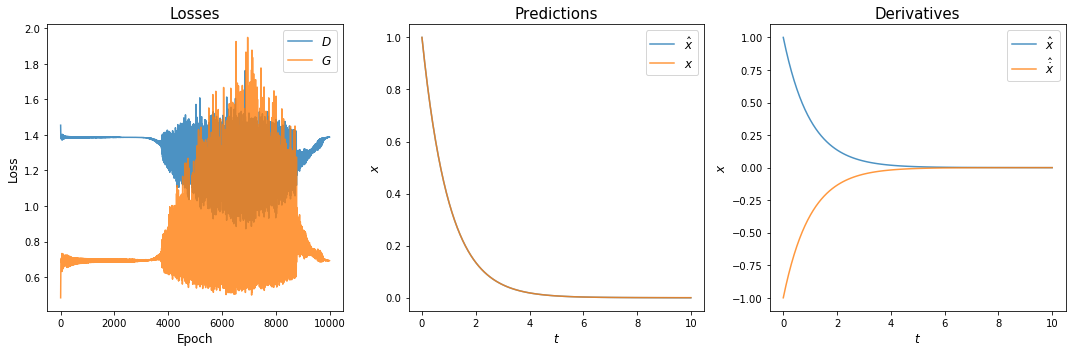

Final MSE 2.382820163404631e-08


{'final_mse': 2.382820163404631e-08, 'model': MLP(
   (layers): ModuleList(
     (0): Linear(in_features=1, out_features=16, bias=True)
     (1): Tanh()
     (2): ResidualBlock(
       (activation): Tanh()
       (l1): Linear(in_features=16, out_features=16, bias=True)
       (l2): Linear(in_features=16, out_features=16, bias=True)
     )
     (3): ResidualBlock(
       (activation): Tanh()
       (l1): Linear(in_features=16, out_features=16, bias=True)
       (l2): Linear(in_features=16, out_features=16, bias=True)
     )
     (4): ResidualBlock(
       (activation): Tanh()
       (l1): Linear(in_features=16, out_features=16, bias=True)
       (l2): Linear(in_features=16, out_features=16, bias=True)
     )
     (5): Linear(in_features=16, out_features=1, bias=True)
   )
 )}

In [57]:
gan_experiment(problem, seed=0, gen_kwargs=gen_args, disc_kwargs=disc_args, train_kwargs=gan_args)

In [64]:
gan_args['wgan'] = True
gan_args['lr_schedule'] = False
disc_args['regress'] = True

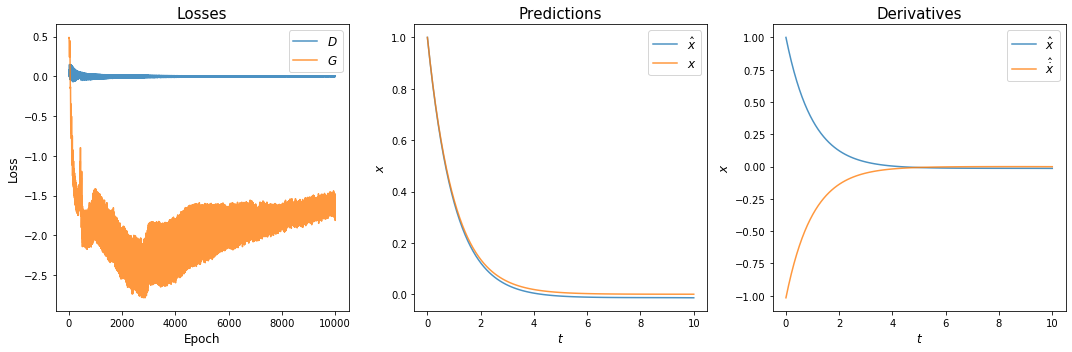

Final MSE 0.00016852666158229113


{'final_mse': 0.00016852666158229113, 'model': MLP(
   (layers): ModuleList(
     (0): Linear(in_features=1, out_features=16, bias=True)
     (1): Tanh()
     (2): ResidualBlock(
       (activation): Tanh()
       (l1): Linear(in_features=16, out_features=16, bias=True)
       (l2): Linear(in_features=16, out_features=16, bias=True)
     )
     (3): ResidualBlock(
       (activation): Tanh()
       (l1): Linear(in_features=16, out_features=16, bias=True)
       (l2): Linear(in_features=16, out_features=16, bias=True)
     )
     (4): ResidualBlock(
       (activation): Tanh()
       (l1): Linear(in_features=16, out_features=16, bias=True)
       (l2): Linear(in_features=16, out_features=16, bias=True)
     )
     (5): Linear(in_features=16, out_features=1, bias=True)
   )
 )}

In [65]:
gan_experiment(problem, seed=0, gen_kwargs=gen_args, disc_kwargs=disc_args, train_kwargs=gan_args)

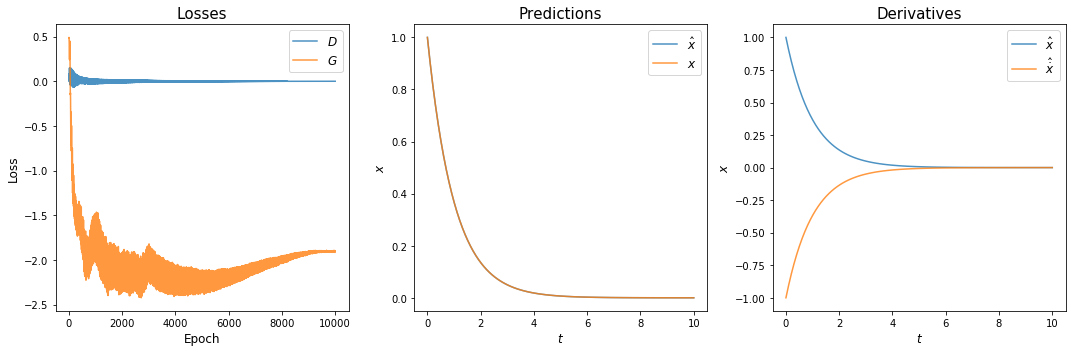

Final MSE 2.1276365114175633e-09


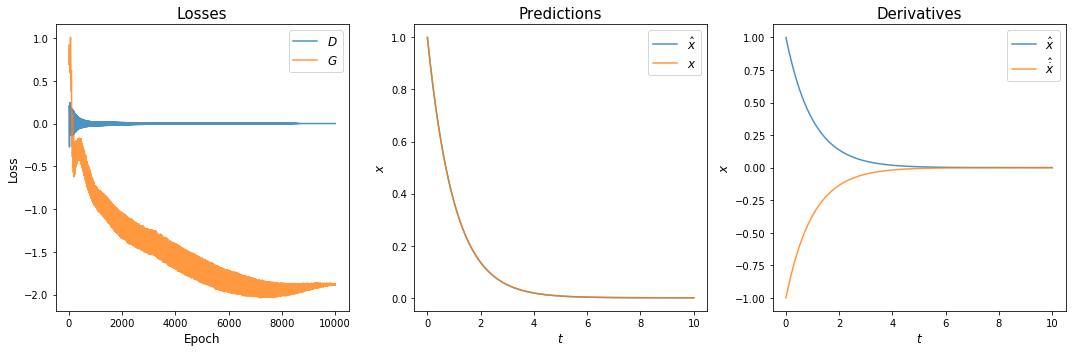

Final MSE 9.92376314457033e-09


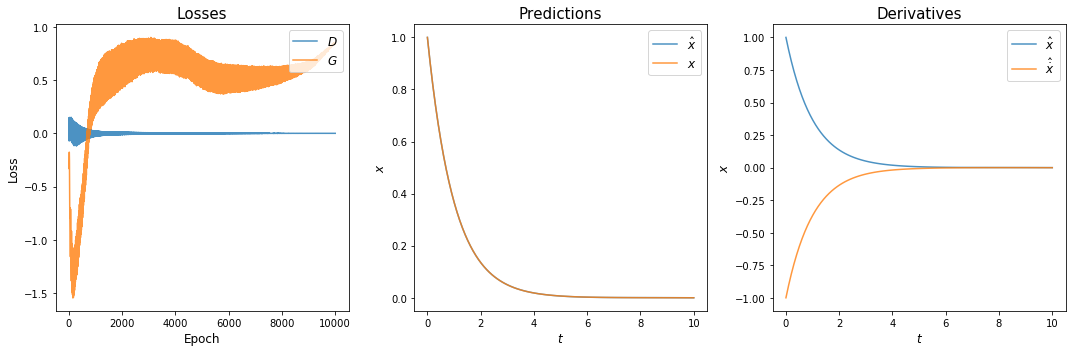

Final MSE 2.181595881722842e-08


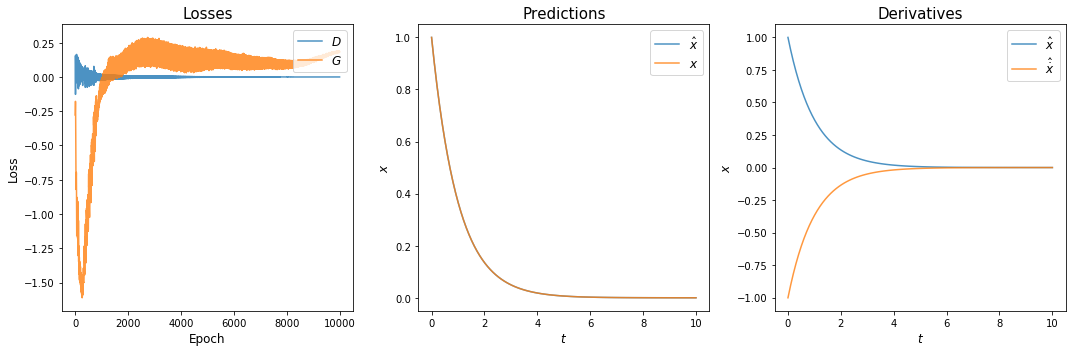

Final MSE 1.960334783390749e-09


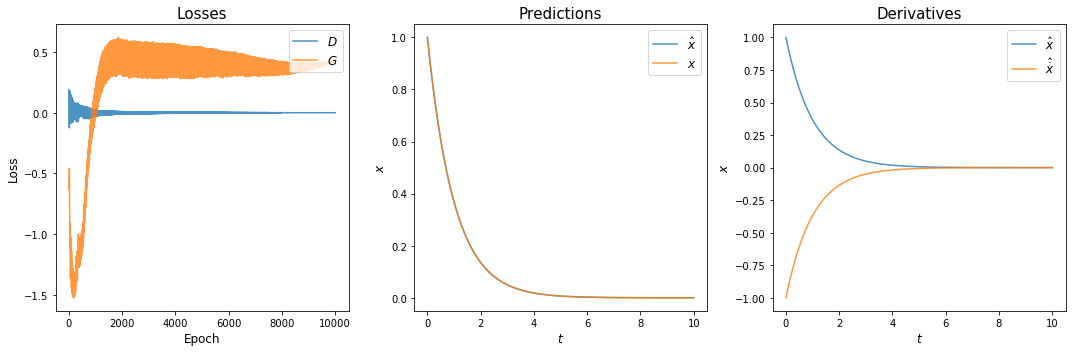

Final MSE 1.969886698205414e-09


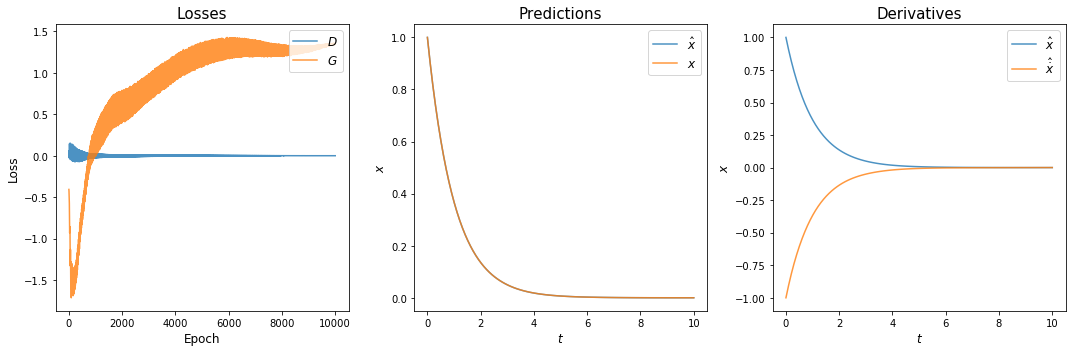

Final MSE 1.3026648204572666e-08


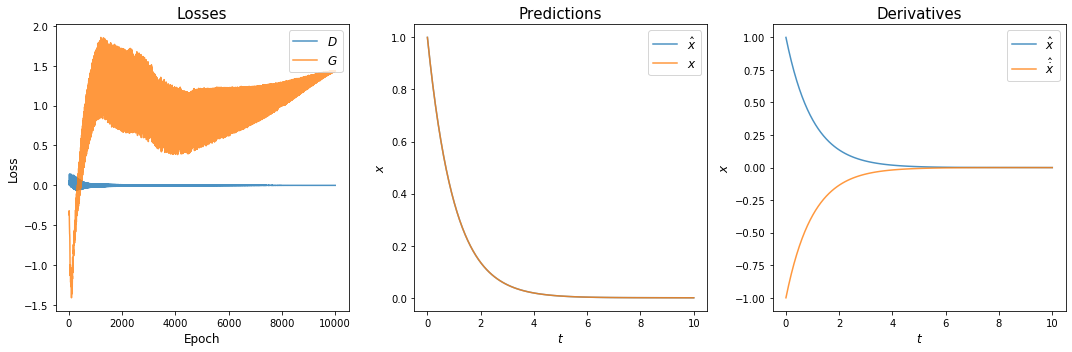

Final MSE 5.730375285395439e-09


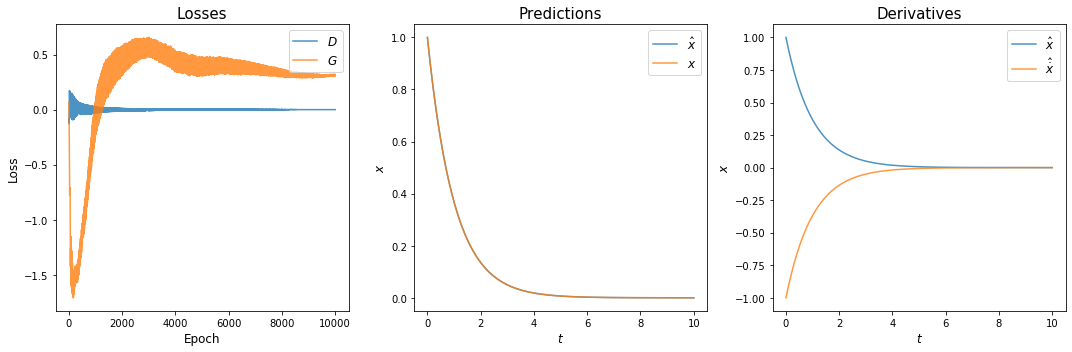

Final MSE 1.2469503207768184e-09


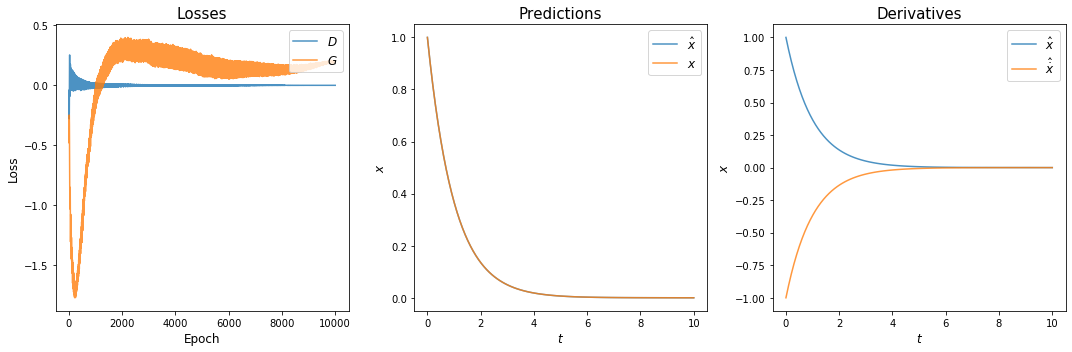

Final MSE 3.1893754304235244e-09


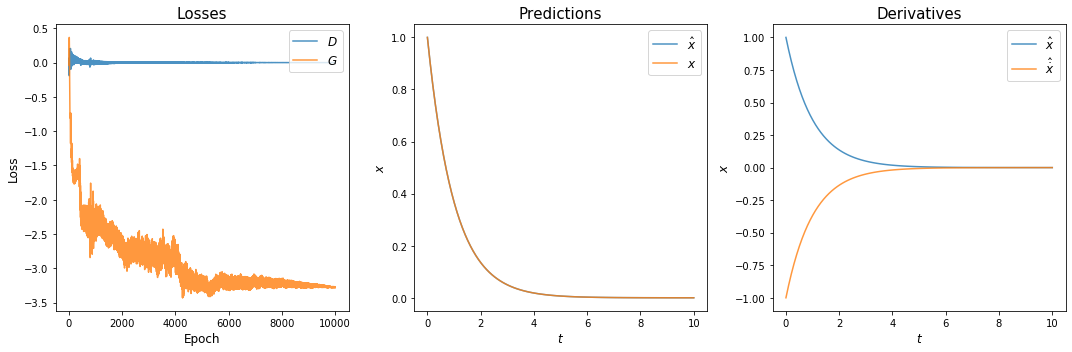

Final MSE 1.2406046190349684e-09


In [60]:
gan_mses = []
for s in range(10):
    res = gan_experiment(problem, seed=s, gen_kwargs=gen_args, disc_kwargs=disc_args, train_kwargs=gan_args)
    gan_mses.append(res['final_mse'])

In [62]:
from denn.experiments import L2_experiment

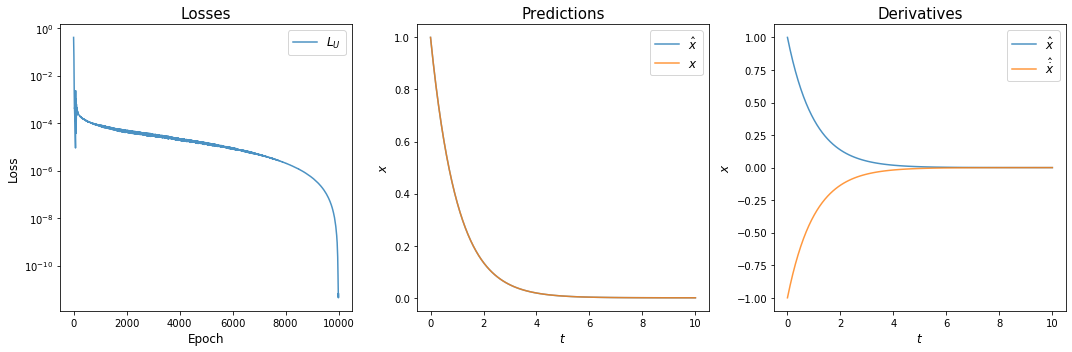

Final MSE 1.9767553479516087e-12


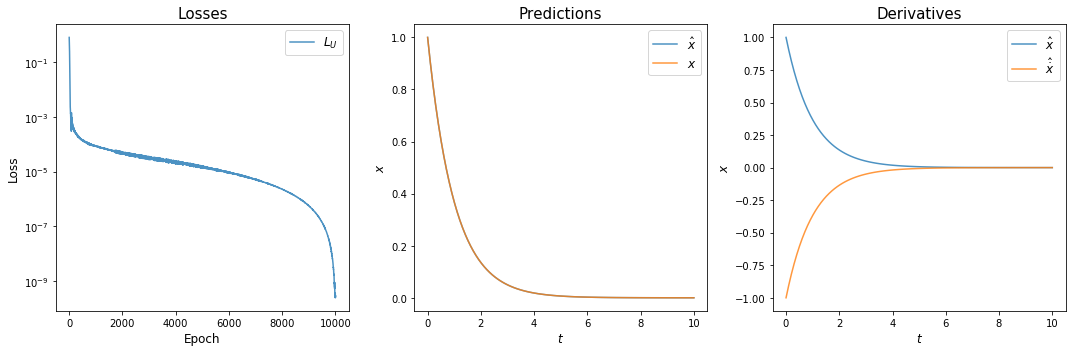

Final MSE 8.258995570775696e-11


KeyboardInterrupt: 

In [63]:
L2_mses = []
for s in range(10):
    res = L2_experiment(problem, seed=s, model_kwargs=cfg.L2_mlp_kwargs, train_kwargs=cfg.L2_kwargs)
    L2_mses.append(res['final_mse'])